In [2]:
#load data
import numpy as np
train_features =  np.loadtxt('/Users/Joe/Desktop/HAPTDataset/train/X_train.txt')
train_labels = np.loadtxt('/Users/Joe/Desktop/HAPTDataset/train/y_train.txt')
test_features=np.loadtxt('/Users/Joe/Desktop/HAPTDataset/test/X_test.txt')
test_labels=np.loadtxt('/Users/Joe/Desktop/HAPTDataset/test/y_test.txt')
train_features.shape

(7767, 561)

In [3]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
#scale train and test features first
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
scaler.fit(train_features)
train_features = scaler.transform(train_features)
test_features = scaler.transform(test_features)

In [4]:
#train classifier and predict
#keep tracking time consumation 
from sklearn.metrics import accuracy_score
import timeit
Time_1=[]
Out_Accuracy_1=[]
start_time = timeit.default_timer()
#load multiple layer 
#http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
#model selection: choose the best number of hidden layer, it show hidden_layer_sizes = 50 gives the best result
for i in range(30,60):
    clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(i,), random_state=1)
    fit=clf.fit(train_features,train_labels)
    pred=fit.predict(test_features)
    Out_Accuracy_1.append(accuracy_score(test_labels,pred))
elapsed = timeit.default_timer() - start_time
Time_1.append(elapsed)

print(Out_Accuracy_1)
print Time_1

[0.93927893738140422, 0.93580012650221378, 0.92726122707147374, 0.93358633776091082, 0.93548387096774188, 0.92884250474383301, 0.92504743833017078, 0.93232131562302345, 0.93232131562302345, 0.93580012650221378, 0.93738140417457305, 0.93168880455407965, 0.92504743833017078, 0.93232131562302345, 0.93738140417457305, 0.93611638203668568, 0.93833017077798864, 0.9348513598987982, 0.93991144845034791, 0.93738140417457305, 0.94054395951929159, 0.92220113851992414, 0.93453510436432641, 0.93833017077798864, 0.92947501581277669, 0.93801391524351674, 0.92473118279569888, 0.93864642631246042, 0.93959519291587601, 0.93010752688172038]
[216.84544396400452]


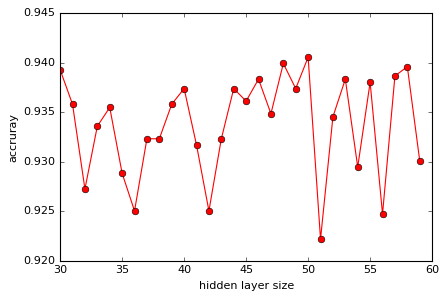

In [17]:
#plot accuracy
import matplotlib.pyplot as plt
%matplotlib inline
x = range(30,60)
y = Out_Accuracy_1
plt.ylabel("accruray")
plt.xlabel("hidden layer size")
plt.plot(x,y,'o-', color="r")
plt.show()

In [11]:
#choose hidden layer size: 50
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,), random_state=1)
fit=clf.fit(train_features,train_labels)
pred=fit.predict(test_features)
Out_Accuracy = accuracy_score(test_labels,pred)
print(Out_Accuracy)

0.940543959519


In [12]:
from sklearn.metrics import f1_score
#check fi_score in case the accuracy is not eccurate.
f1_score(test_labels,pred,average='weighted')

0.94047674531895942

In [13]:
#learning curve
%matplotlib inline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
def plot_learning_curve(estimator, title, X,y, ylim=None,cv=None,n_jobs=1,train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes,train_scores,test_scores= learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


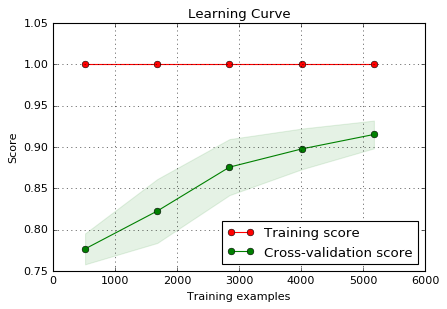

In [14]:
#plot learning curve
#the learning curve show the model has high variance. 
#We tried feature selection to reduce the complexity of the model.
title = "Learning Curve"
estimator = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(50,), random_state=1);
plot_learning_curve(estimator, title, train_features,train_labels, None, None, n_jobs=4)
plt.show()

In [15]:
#Do feature selection using pca
from sklearn.decomposition import PCA
pca = PCA(n_components=200)
pca = pca.fit(train_features);
X_pca = pca.transform(train_features)
x_pca_test = pca.transform(test_features)
x_pca_test.shape

(3162, 200)

In [16]:
clf = clf.fit(X_pca, train_labels)
pred=fit.predict(x_pca_test)
Out_Accuracy_2 = accuracy_score(test_labels,pred)
print(Out_Accuracy_2)
#reducing complexy is not helpful
#Future work: gain more data might get higher accuracy. 

0.924098671727
